In [1]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

print("The MNIST database has a training set of %d examples<"%len(X_train))
print("The MNIST database has a test set of %d examples<"%len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The MNIST database has a training set of 60000 examples<
The MNIST database has a test set of 10000 examples<


In [2]:
X_train[0].shape

(28, 28)

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np





   

*   Viewing individual components of the mnist dataset





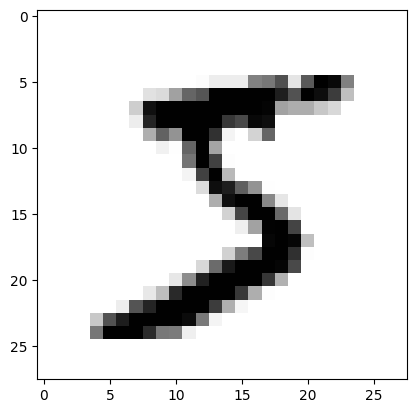

In [5]:
plt.imshow(X_train[0],cmap=cm.binary)
plt.show()

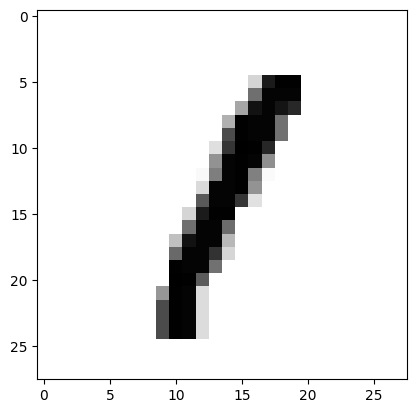

In [6]:
plt.imshow(X_train[77],cmap=cm.binary)
plt.show()

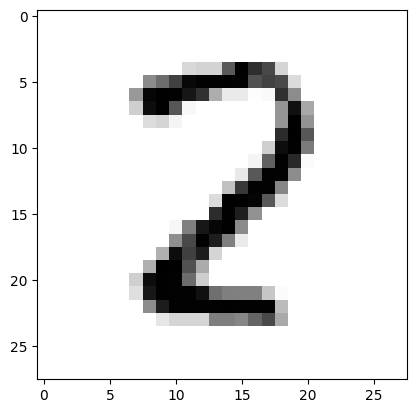

In [7]:
plt.imshow(X_train[1074],cmap=cm.binary)
plt.show()



*   trying to view multiple images at once



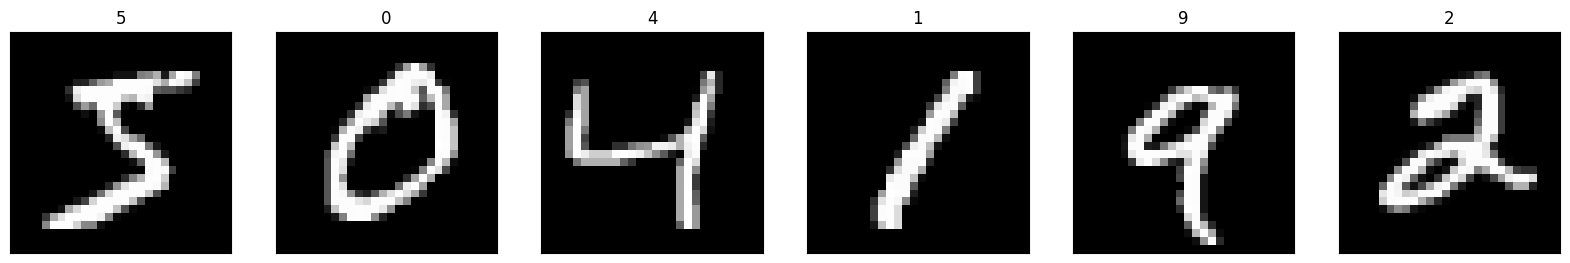

In [8]:
fig=plt.figure(figsize=(20,20))

for i in range(0, 6):
  ax=fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))
plt.show()



*  converting dtypes and knowing the chapes pf x_Train and x_Test



In [9]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')


X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train[0].min()

np.float32(0.0)

In [12]:
X_train[0].max()

np.float32(1.0)

In [13]:
y_train.ndim

1

In [14]:
y_train.shape

(60000,)

In [15]:
len(np.unique(y_train))

10



*   identifying what is y and what to apply over it like is it discrete continuous or what?



In [16]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)



*   reshaping x and y


In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [20]:
X_train[0].ndim

3

In [21]:
import numpy as np
from  google.colab.patches import cv2_imshow
import cv2,os,json,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.datasets import mnist
import matplotlib.cm as cm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [22]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_train.shape

(60000, 10)

In [25]:
y_test.shape

(10000, 10)

In [26]:
y_test.ndim

2

**model creation**

In [27]:
model = Sequential([
    Conv2D(38, kernel_size=(6, 6),padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(76, kernel_size=(4, 4),padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




*   model compilation-loss function and optimizer



In [28]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



*   model callbacks-earlystopping and checkpoint



In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)




*  model training




*   PADDING='valid' it resulted  in decreased dim of the image  



In [30]:

hist=model.fit(X_train,y_train,batch_size=64,epochs=15,validation_data=(X_test,y_test),callbacks=[checkpointer,early_stopping],verbose=2,shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 0.04957, saving model to model.weights.best.keras
938/938 - 12s - 13ms/step - accuracy: 0.9150 - loss: 0.2744 - val_accuracy: 0.9849 - val_loss: 0.0496
Epoch 2/15

Epoch 2: val_loss improved from 0.04957 to 0.03609, saving model to model.weights.best.keras
938/938 - 13s - 14ms/step - accuracy: 0.9773 - loss: 0.0773 - val_accuracy: 0.9880 - val_loss: 0.0361
Epoch 3/15

Epoch 3: val_loss improved from 0.03609 to 0.02783, saving model to model.weights.best.keras
938/938 - 4s - 4ms/step - accuracy: 0.9845 - loss: 0.0541 - val_accuracy: 0.9914 - val_loss: 0.0278
Epoch 4/15

Epoch 4: val_loss improved from 0.02783 to 0.02525, saving model to model.weights.best.keras
938/938 - 4s - 5ms/step - accuracy: 0.9876 - loss: 0.0434 - val_accuracy: 0.9924 - val_loss: 0.0253
Epoch 5/15

Epoch 5: val_loss did not improve from 0.02525
938/938 - 3s - 4ms/step - accuracy: 0.9888 - loss: 0.0388 - val_accuracy: 0.9923 - val_loss: 0.0290
Epoch 6/15

Epoch 6: 


saving model weight



In [31]:
#model.load_weights('model.weights.best.keras')



*  model eval



In [32]:
lose,accuracy=model.evaluate(X_test,y_test)
print('Test loss:',lose)
print('Test accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0327
Test loss: 0.027173757553100586
Test accuracy: 0.992900013923645


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 38)     │         1,406 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 38)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 76)       │        46,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 76)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 684)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        68,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,402 (915.64 KB)

 Trainable params: 117,200 (457.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,202 (457.82 KB)